## [ review ]

- 신경망 가중치 매개변수의 손실함수의 기울기 => 수치미분을 이용하여 구함


- 수치미분의 장점: 단순하고 구현하기 쉬움


- 수치미분의 단점: 게산 시간이 오래 걸림


=> 가중치 매개변수의 기울기를 효율적으로 계산하는 방법: '오차역전파법'

## [문제 1]

현빈군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요.       
(단, 소비세가 10% 부과됩니다)

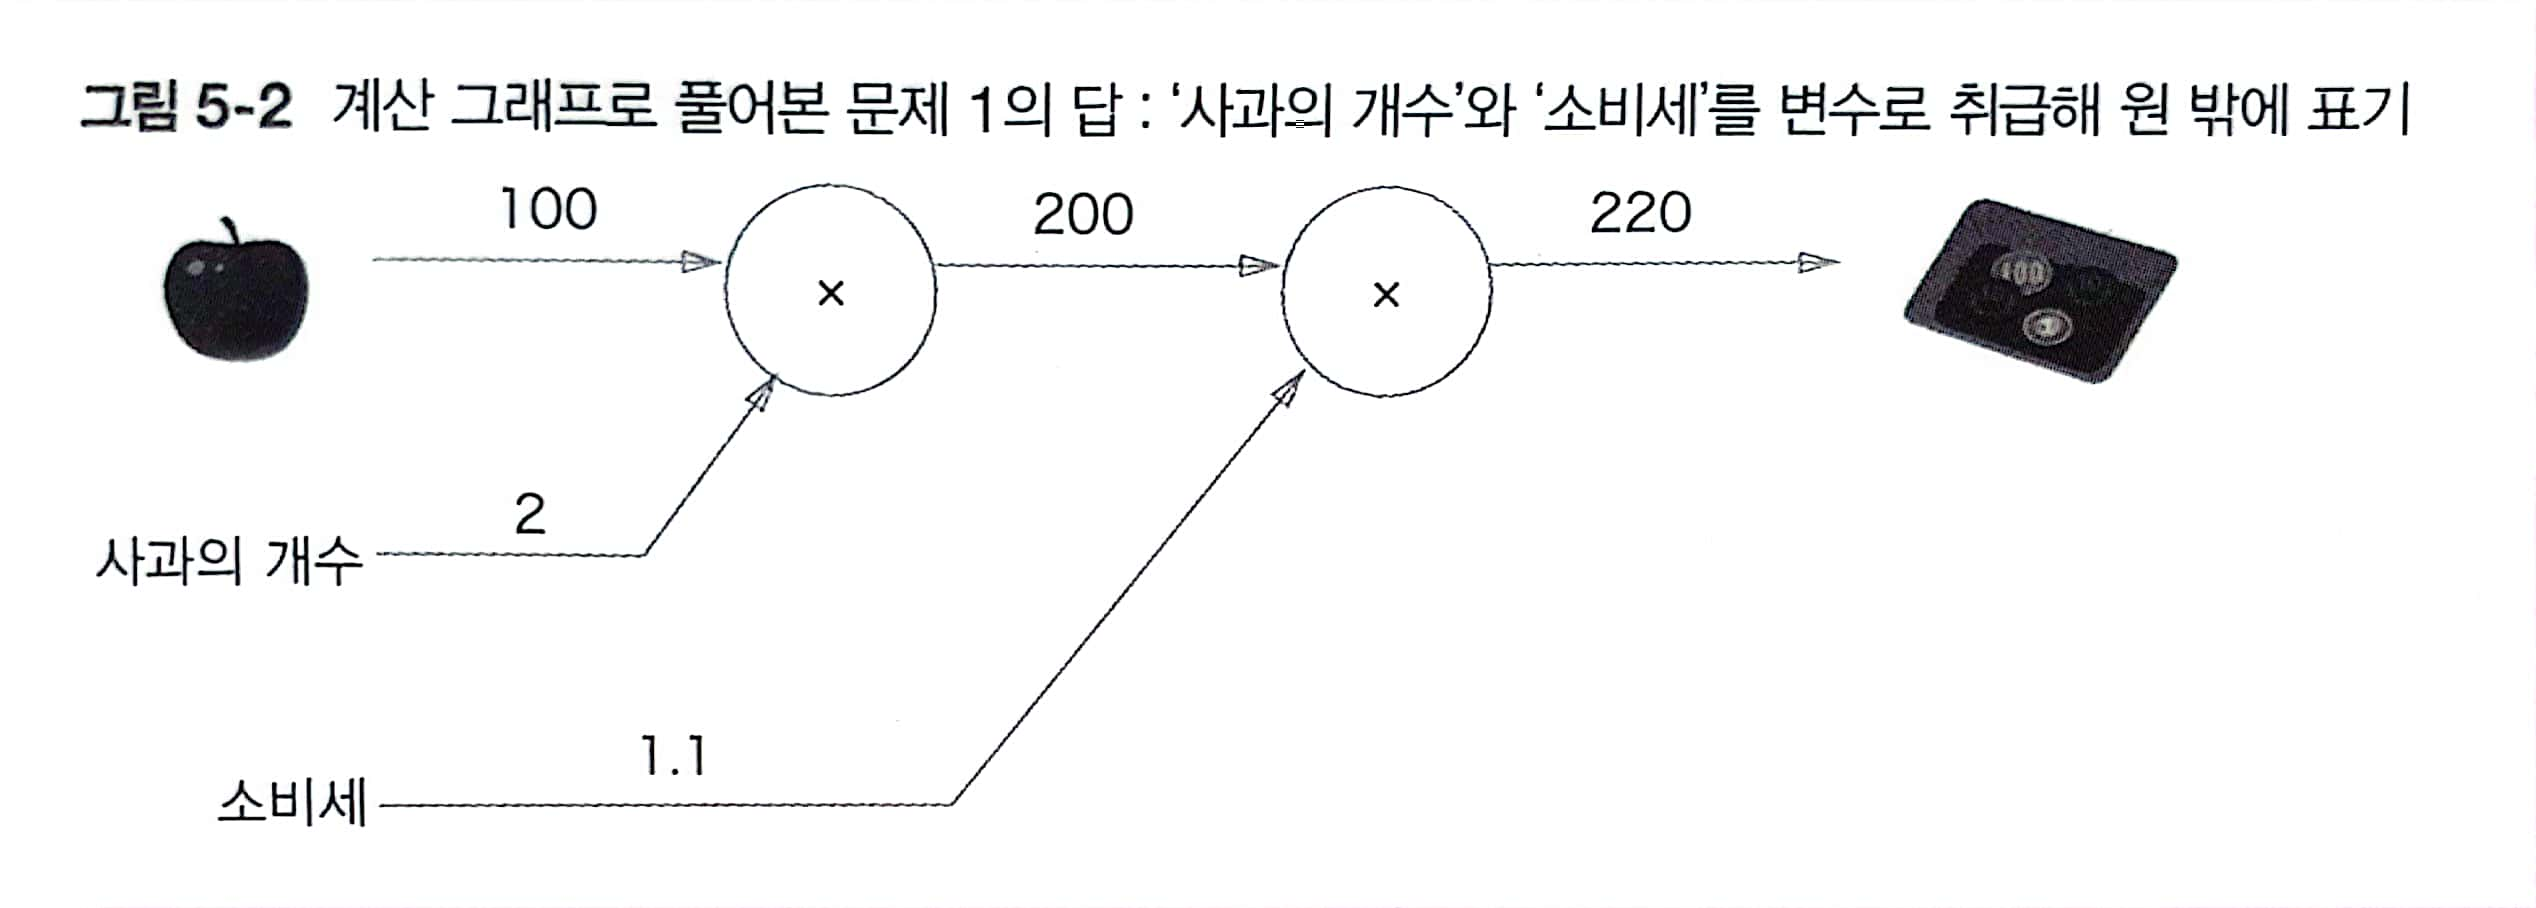

## [문제 2]

현빈군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원 입니다. 소비세가 10%일 때 지불 금액을 구하세요.       

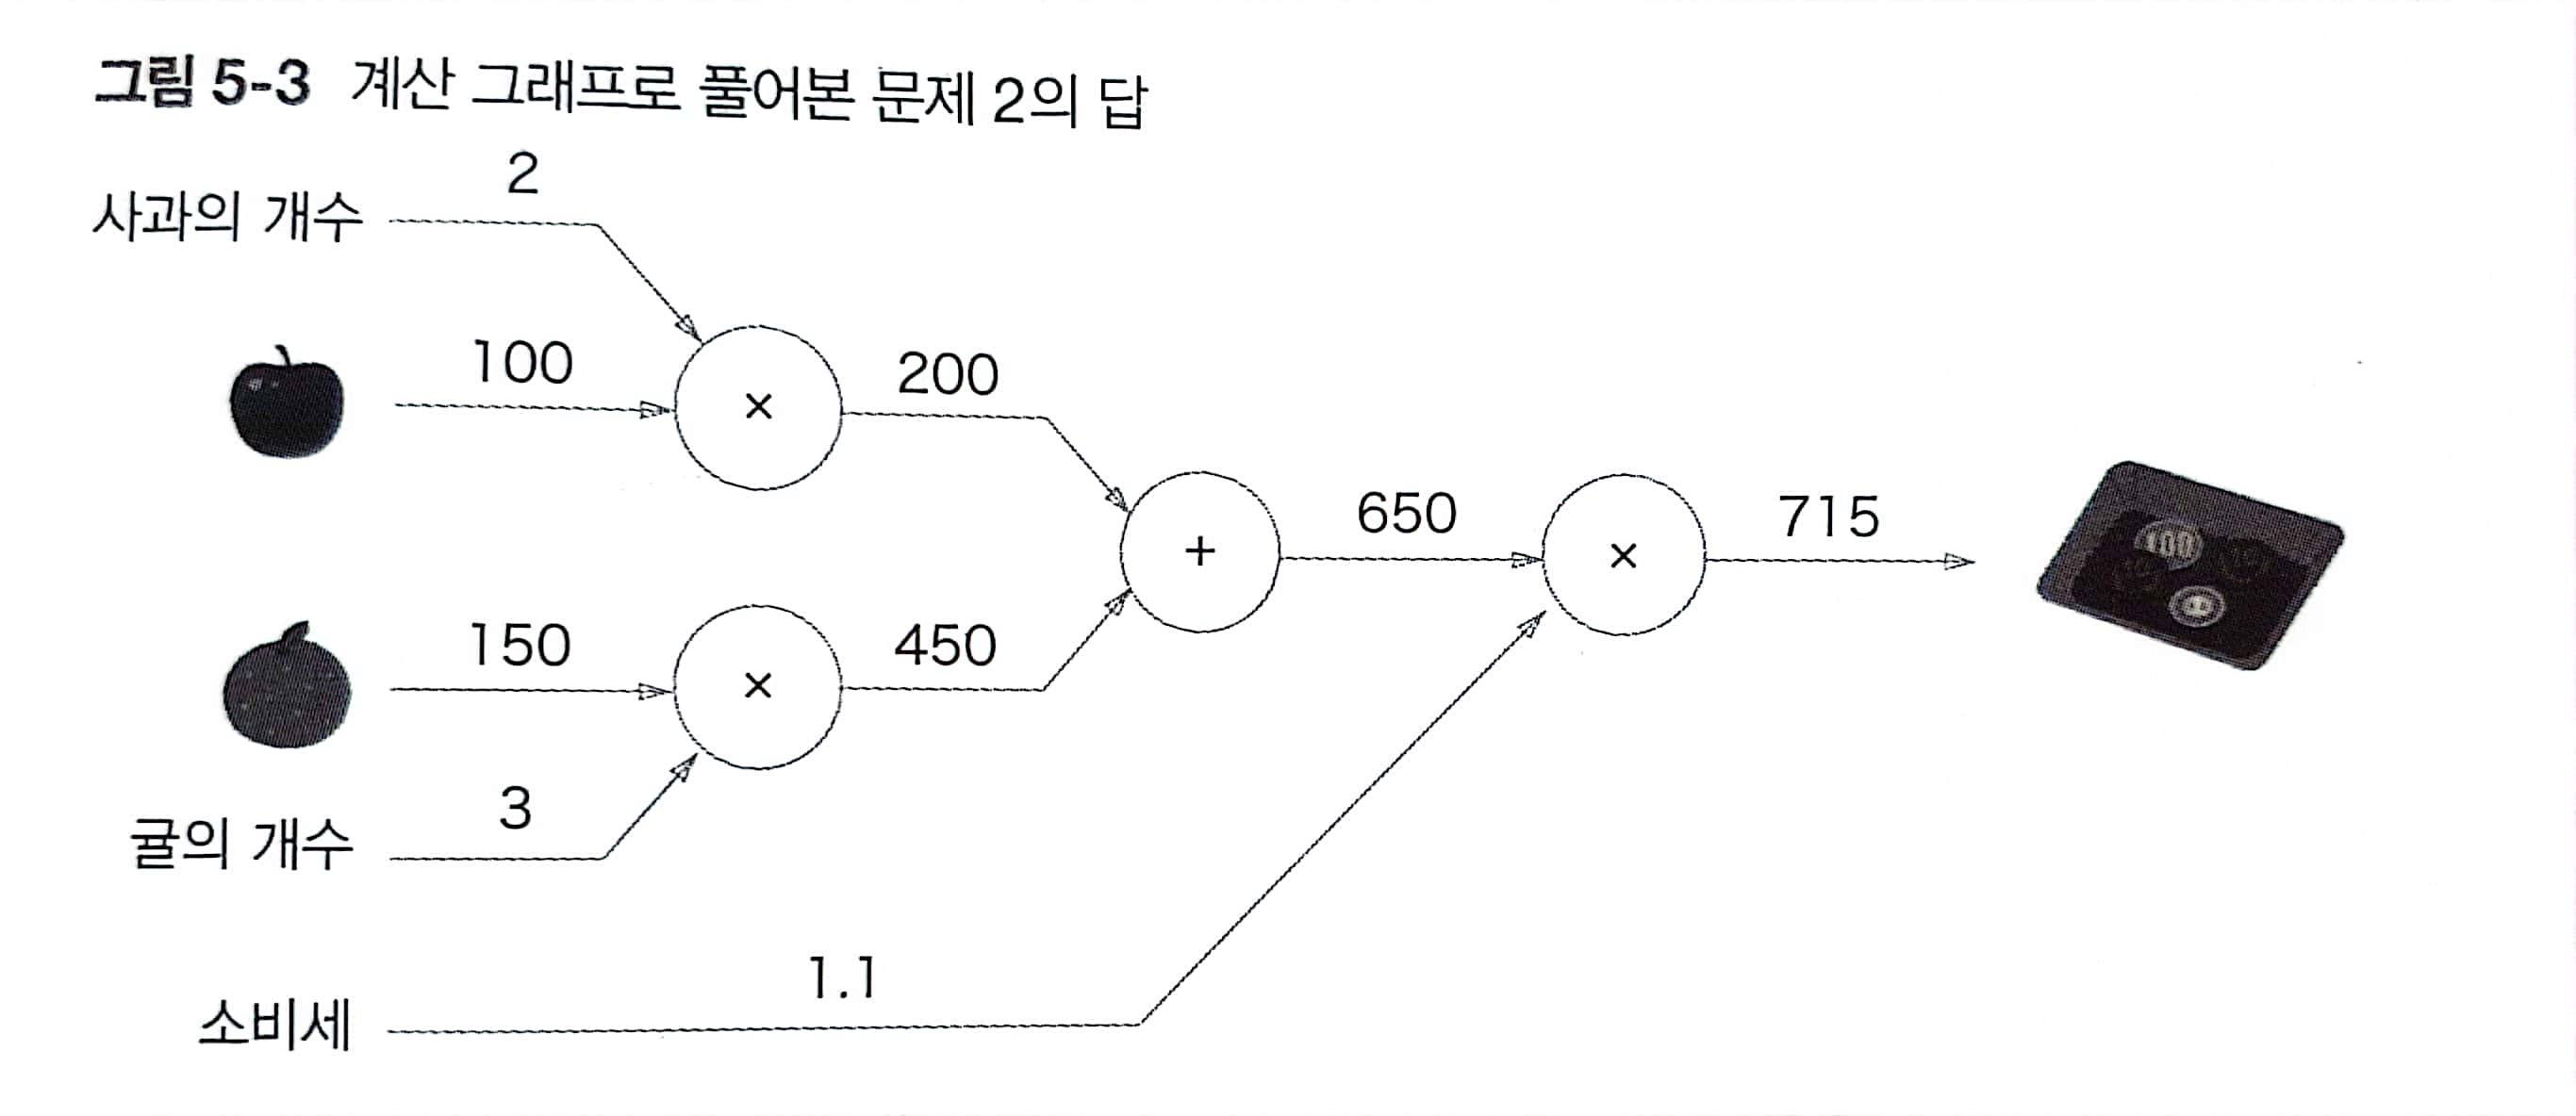

---

# 1. 계산 그래프 

- 계산과정을 그래프로 나타낸 것


- 그래프는 우리가 잘 아는 그래프 자료구조로, 복수의 노드(node)와 에지(edge)로 표현


- 계산을 왼쪽에서 오른쪽으로 진행: 순전파

- 계산을 오른쪽에서 왼쪽으로 진행: 역전파


- 이점: (1) 국소적 계산, (2) 중간 계산결과를 모두 보관 가능, (3) 역전파를 통해 '미분'을 효율적으로 계산할 수 있음.


- 위의 그림 5-2 참조

---

# 2. 국소적 계산

- 국소적: 자신과 직접 관계된 작은 범위

- 국소적 계산: 전체에서 어떤 일이 벌어지든 상관 없이 자신과 관계된 정보만으로 결과를 출력할 수 있음

- 계산 그래프는 국소적 계산에 집중함

- 전체 계산이 아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 국소적 계산임

- 국소적인 계산은 단순하지만, 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산을 해낼 수 있음.

---

# 3. 연쇄법칙

### - 함성함수: 여러함수로 구성된 함수 


### - 합성함수의 미분에 대한 성질: 합성함수의 미분은 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있음


### - 예: 

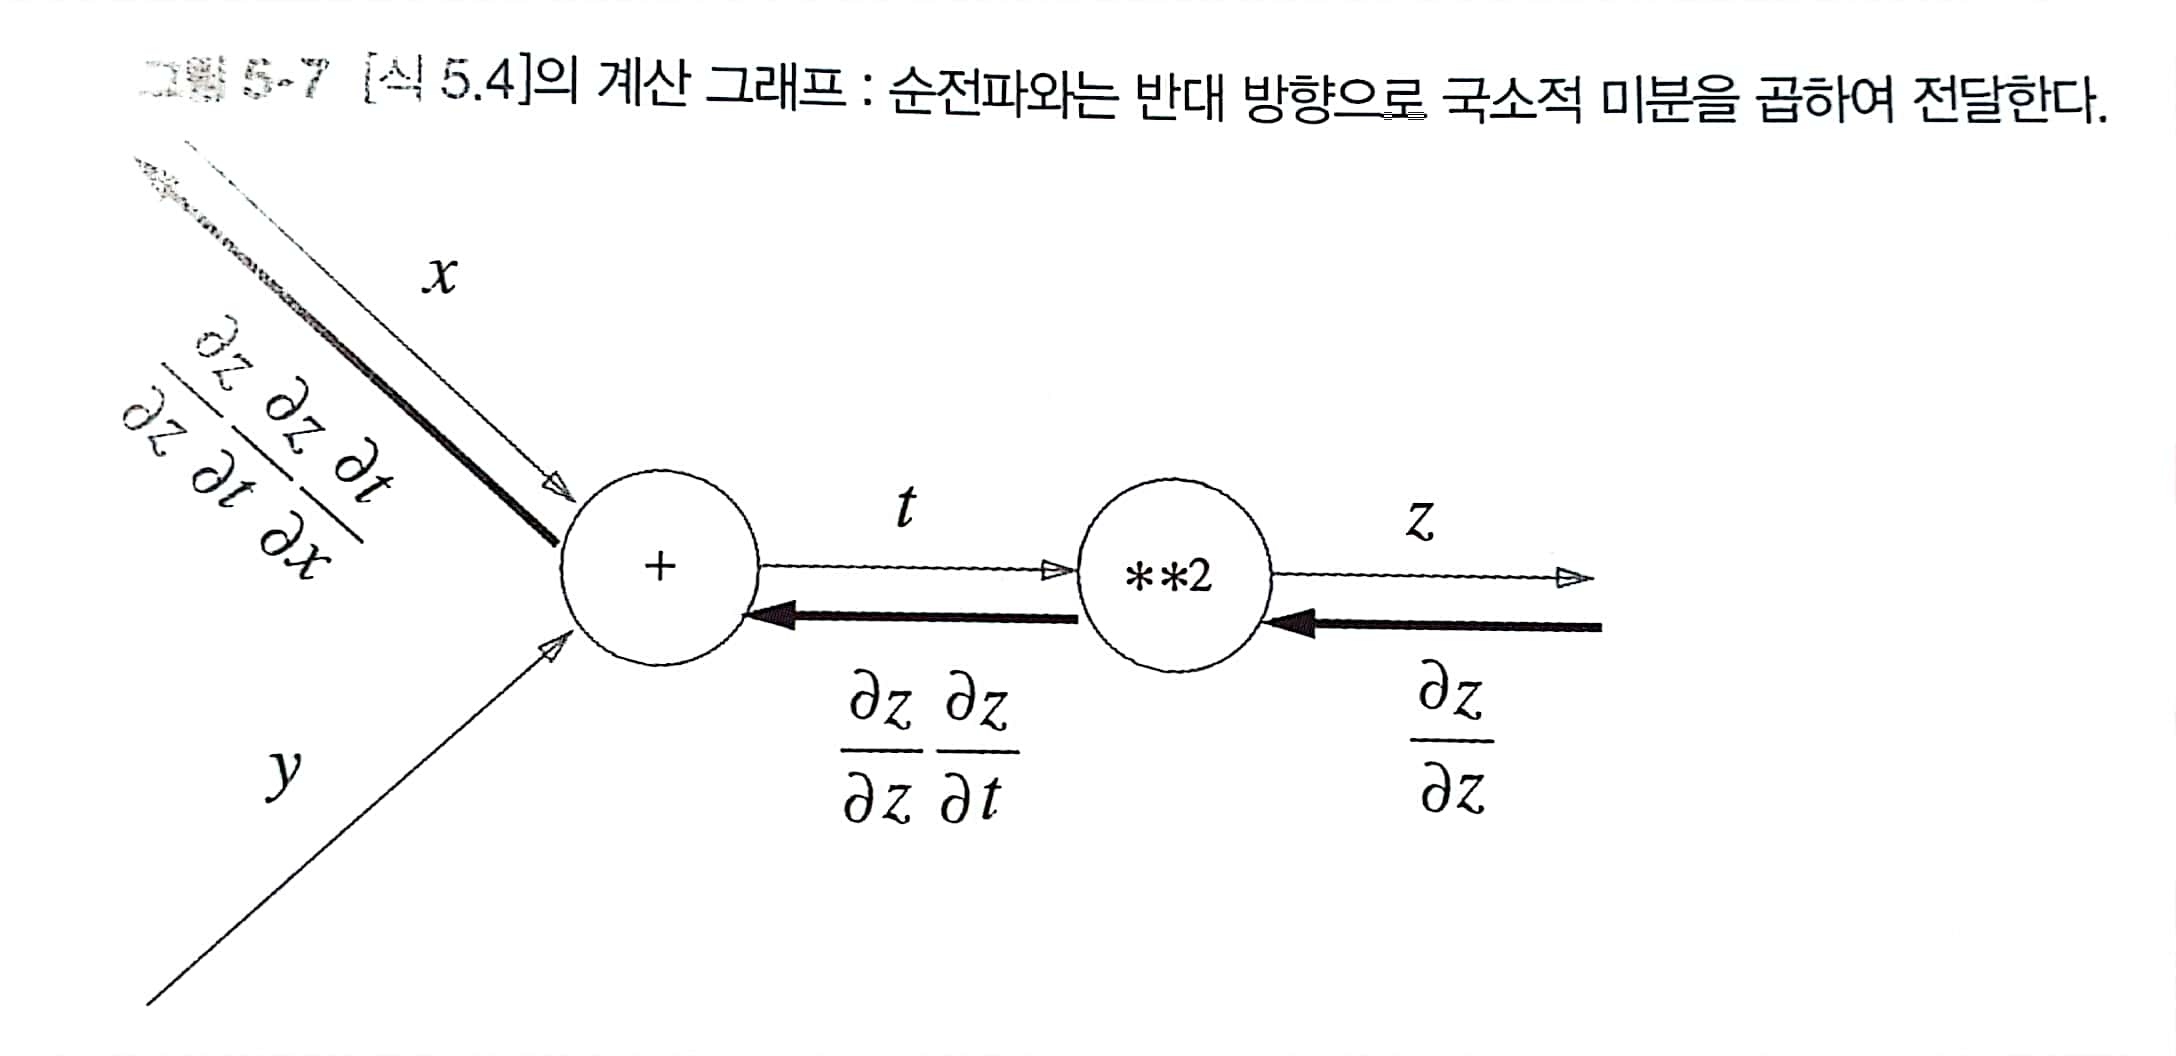

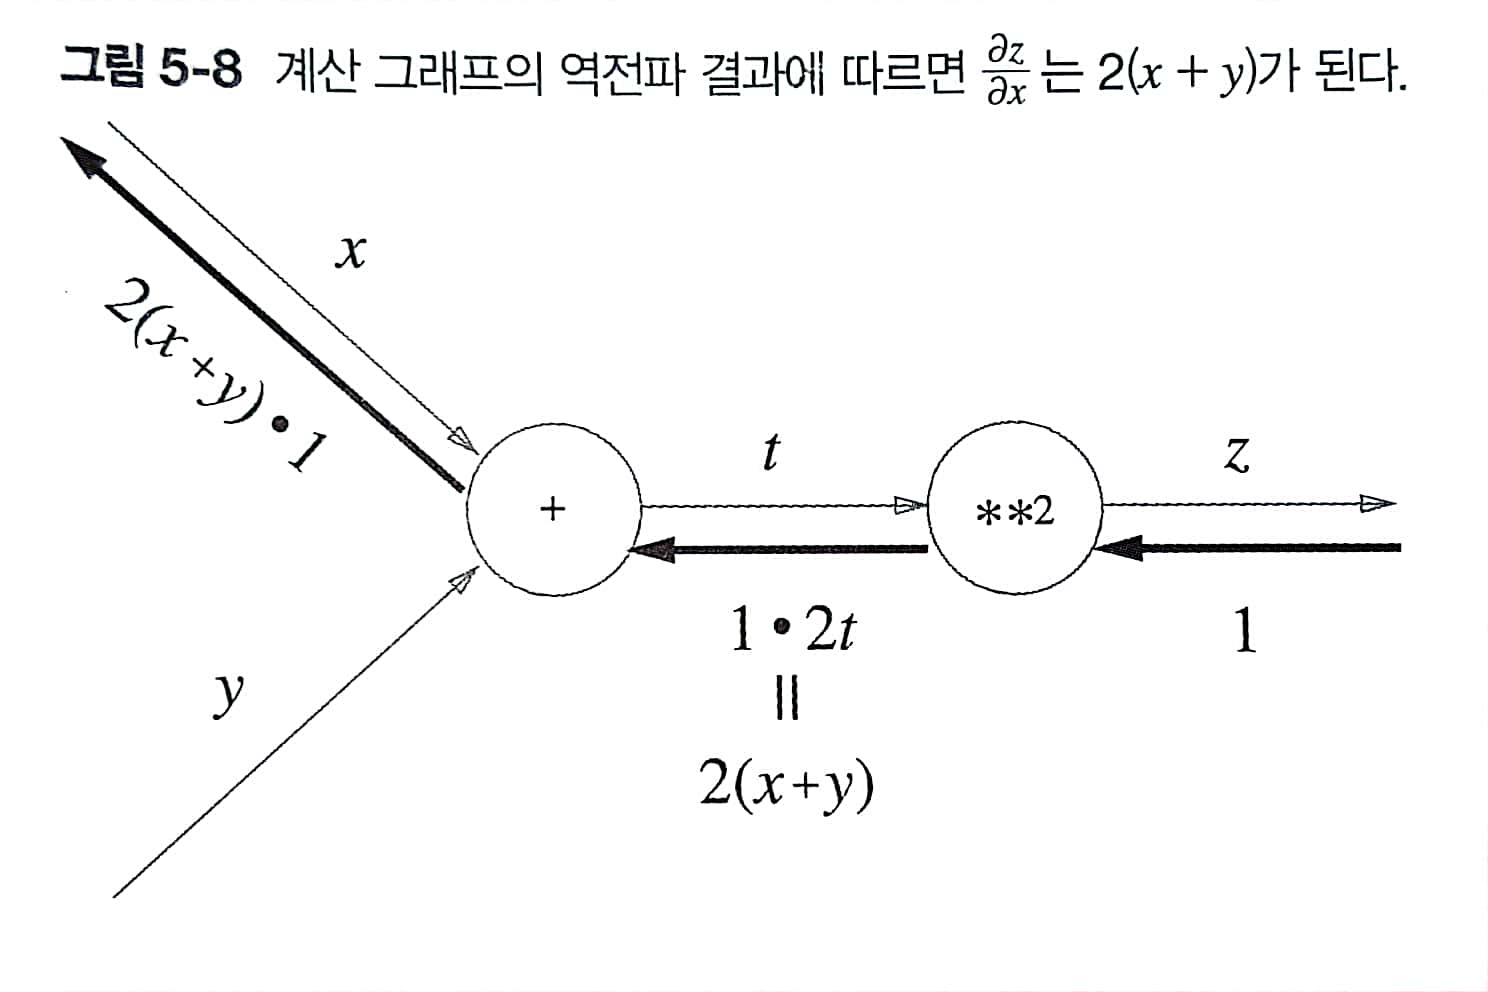



---

# 4. 역전파

- '국소적인 미분'을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달

- 순방향과는 반대방향으로 국소적 미분을 곱한다.

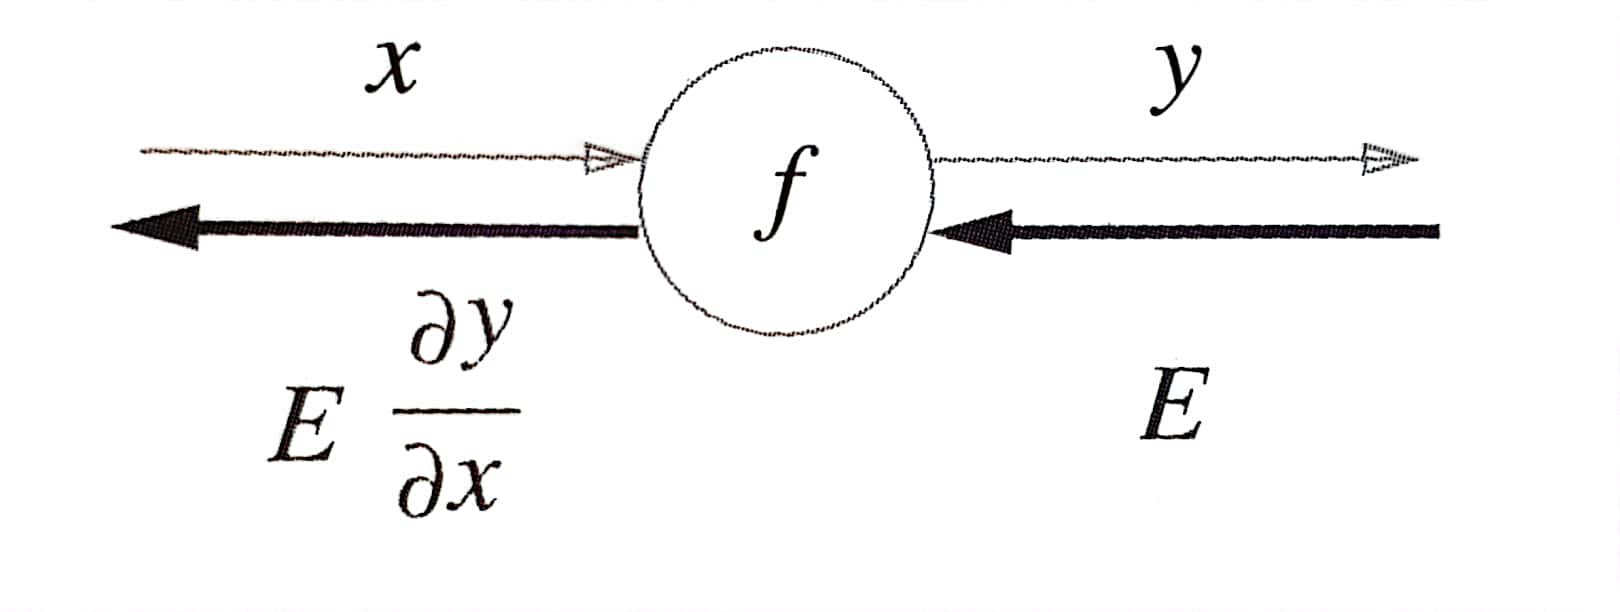


## (1) 덧셈 모드의 역전파
### : 입력값을 그대로 다음 노드로 전달

  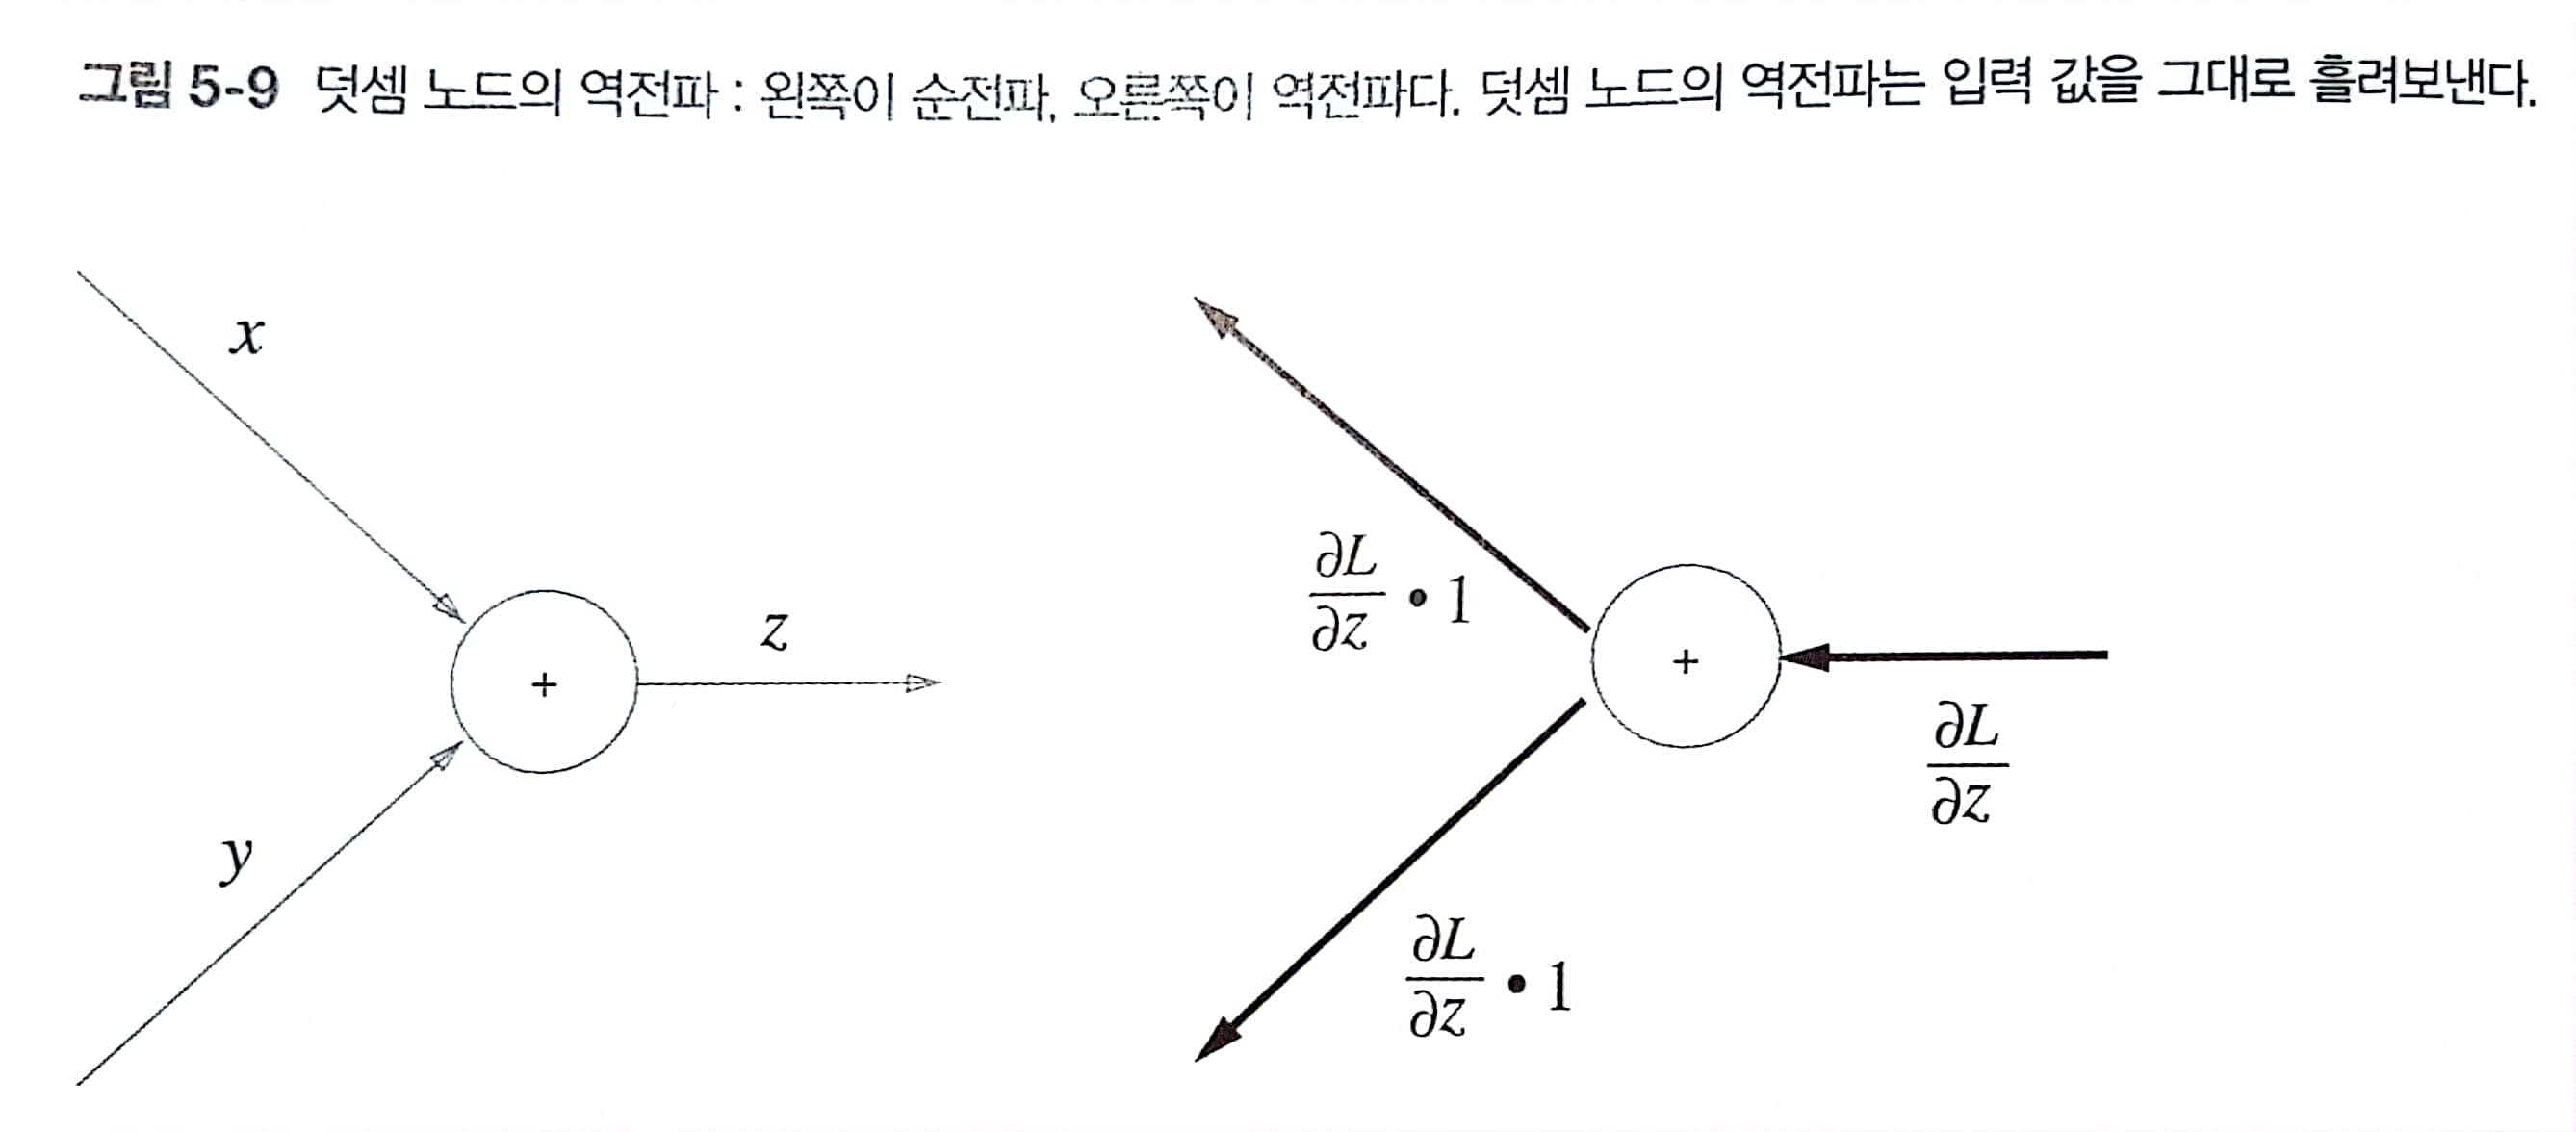
  
  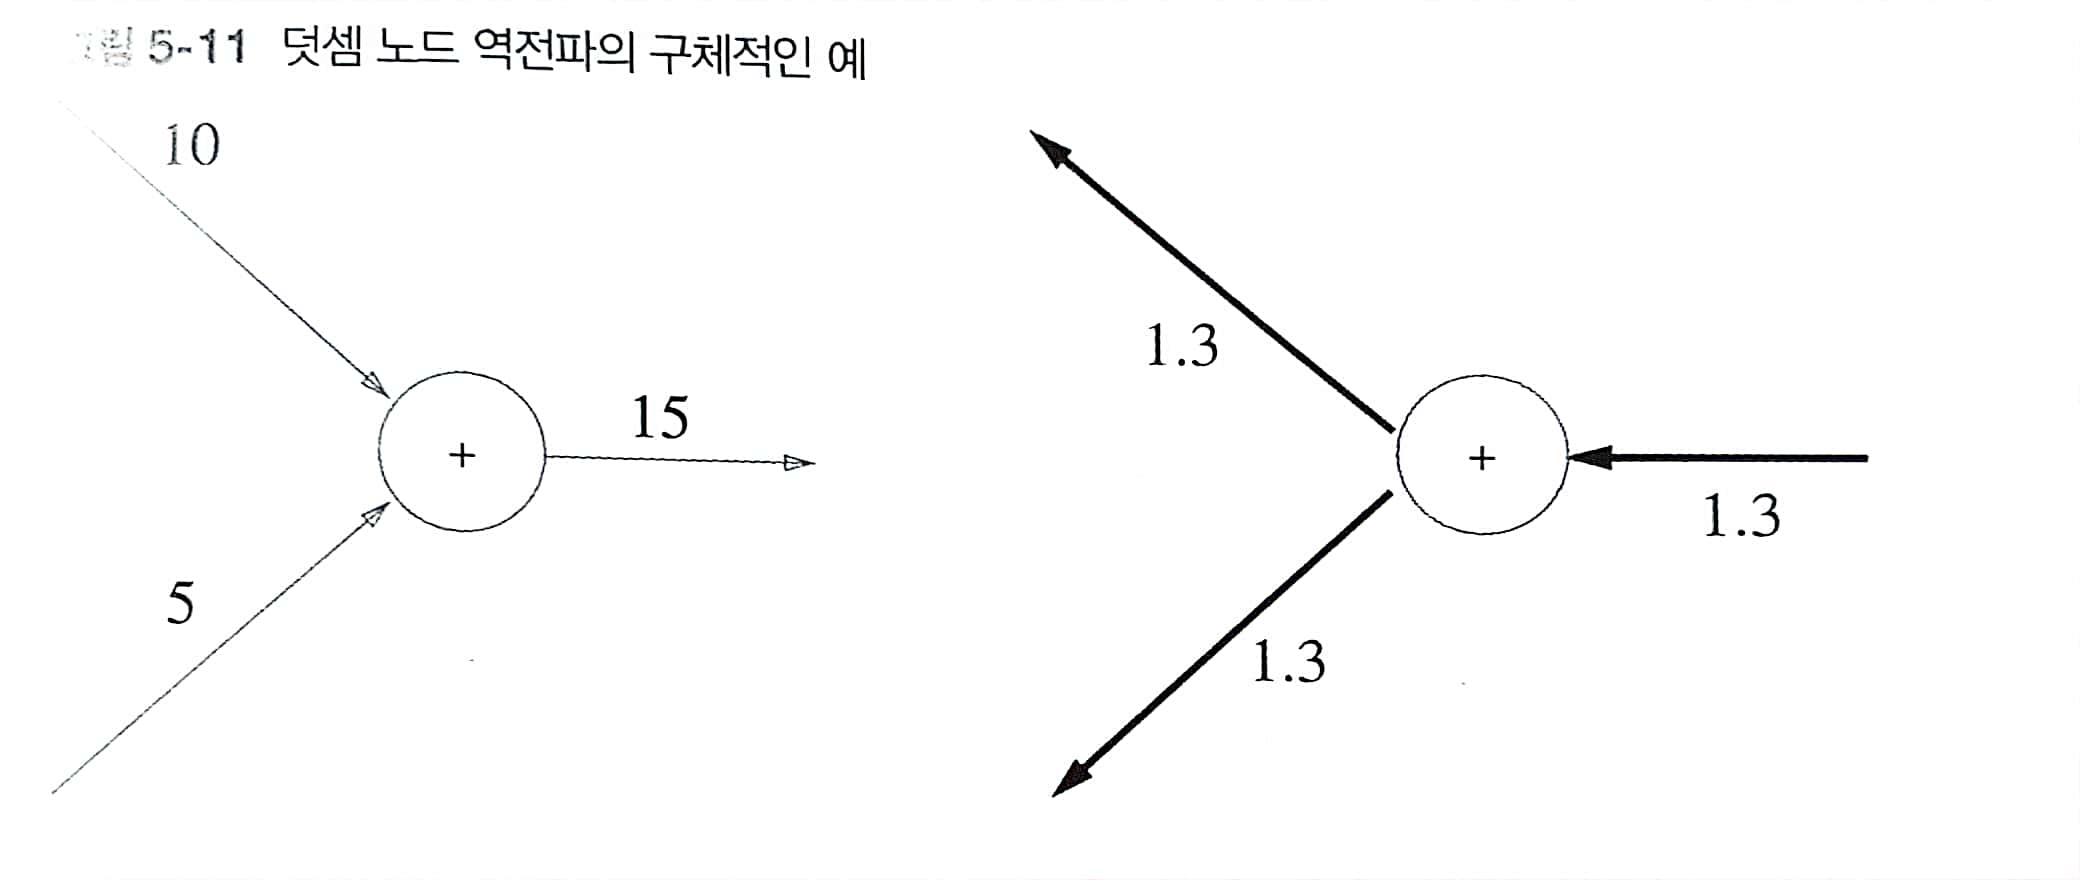

## (2) 곱셈 모드의 역전파
### : 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 다음 노드로 전달

  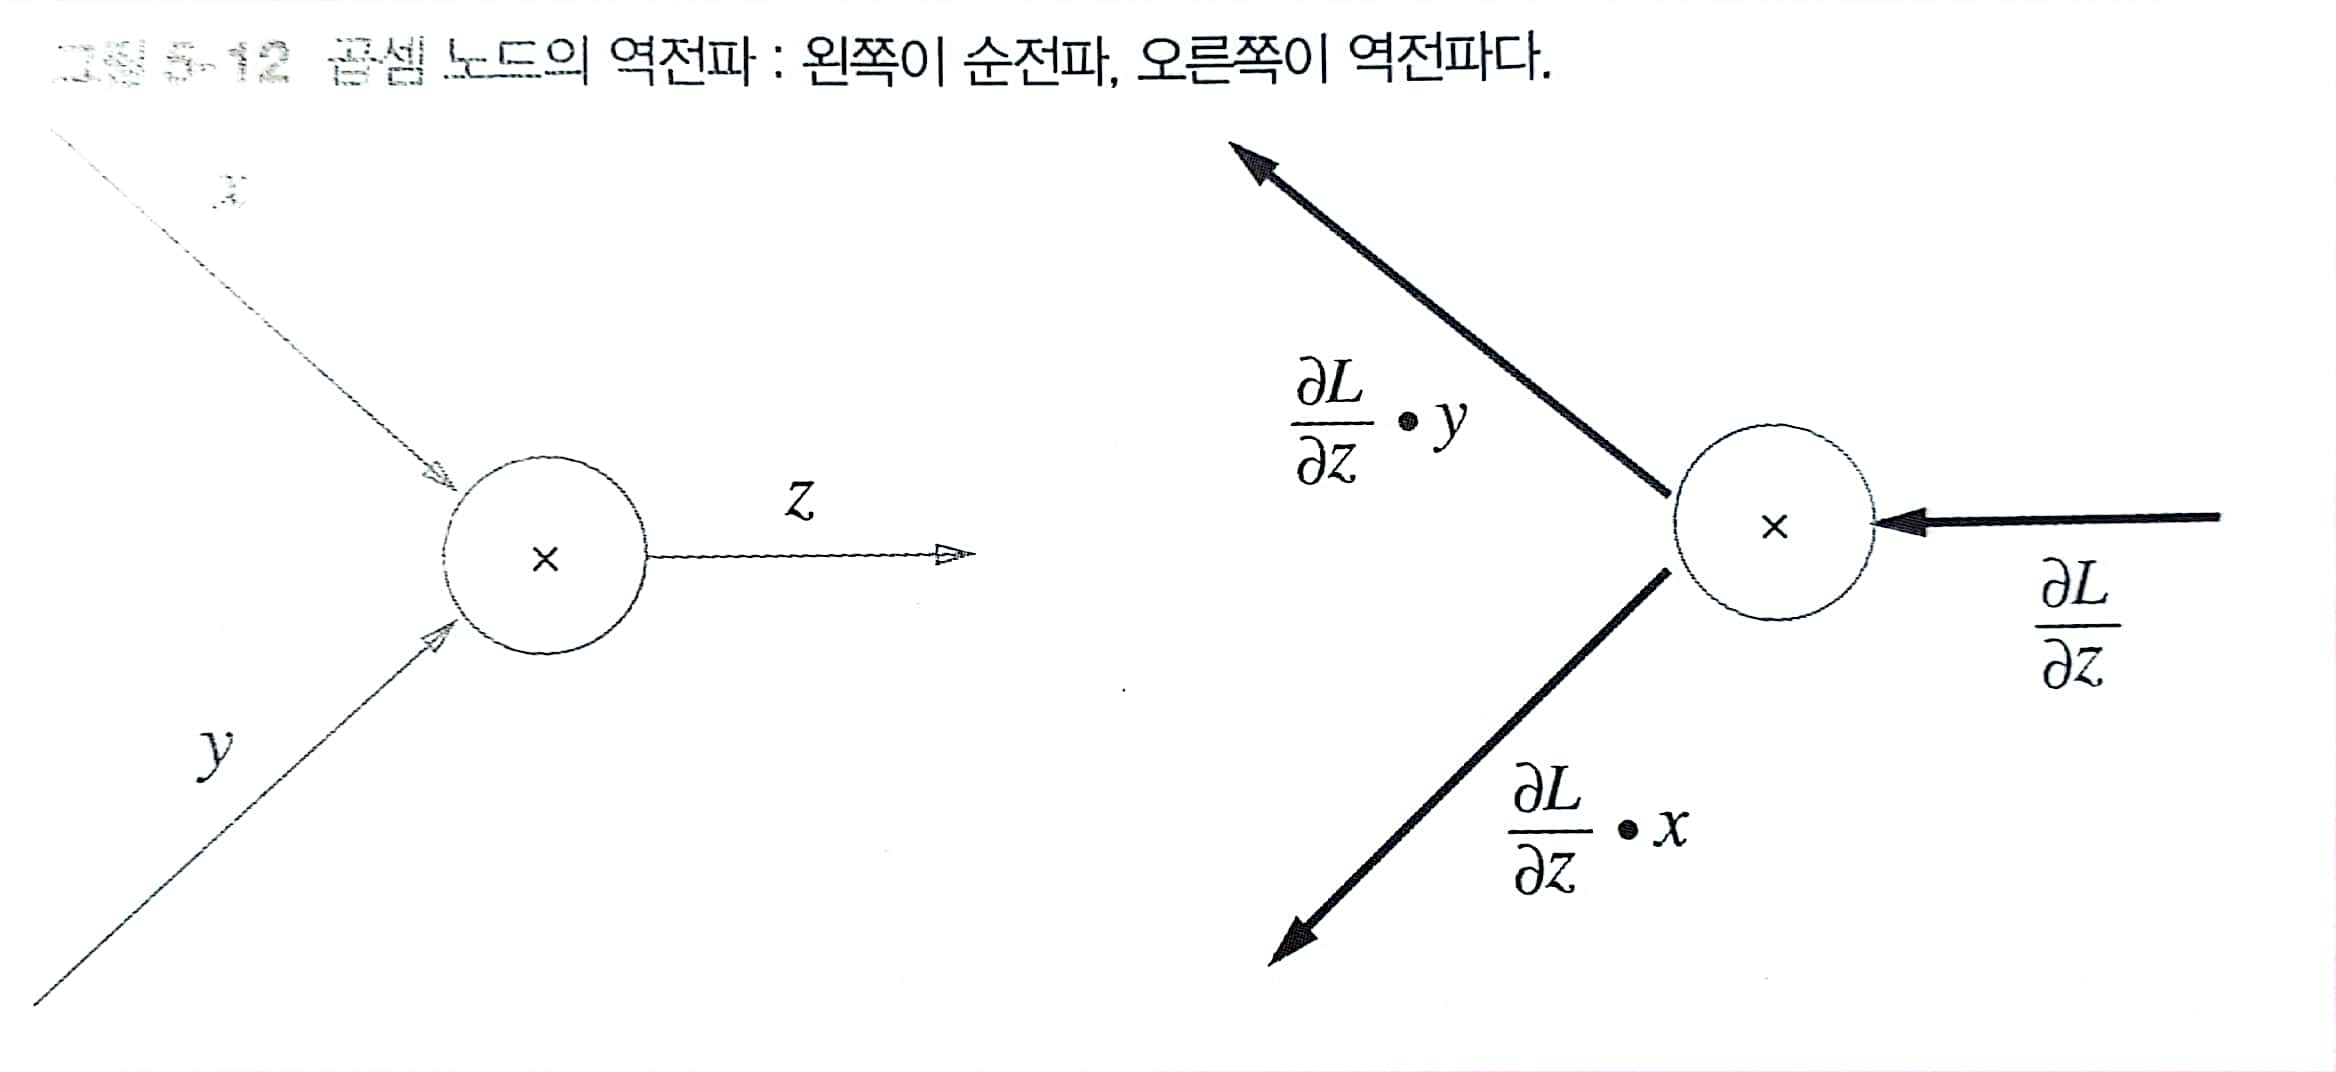
  
  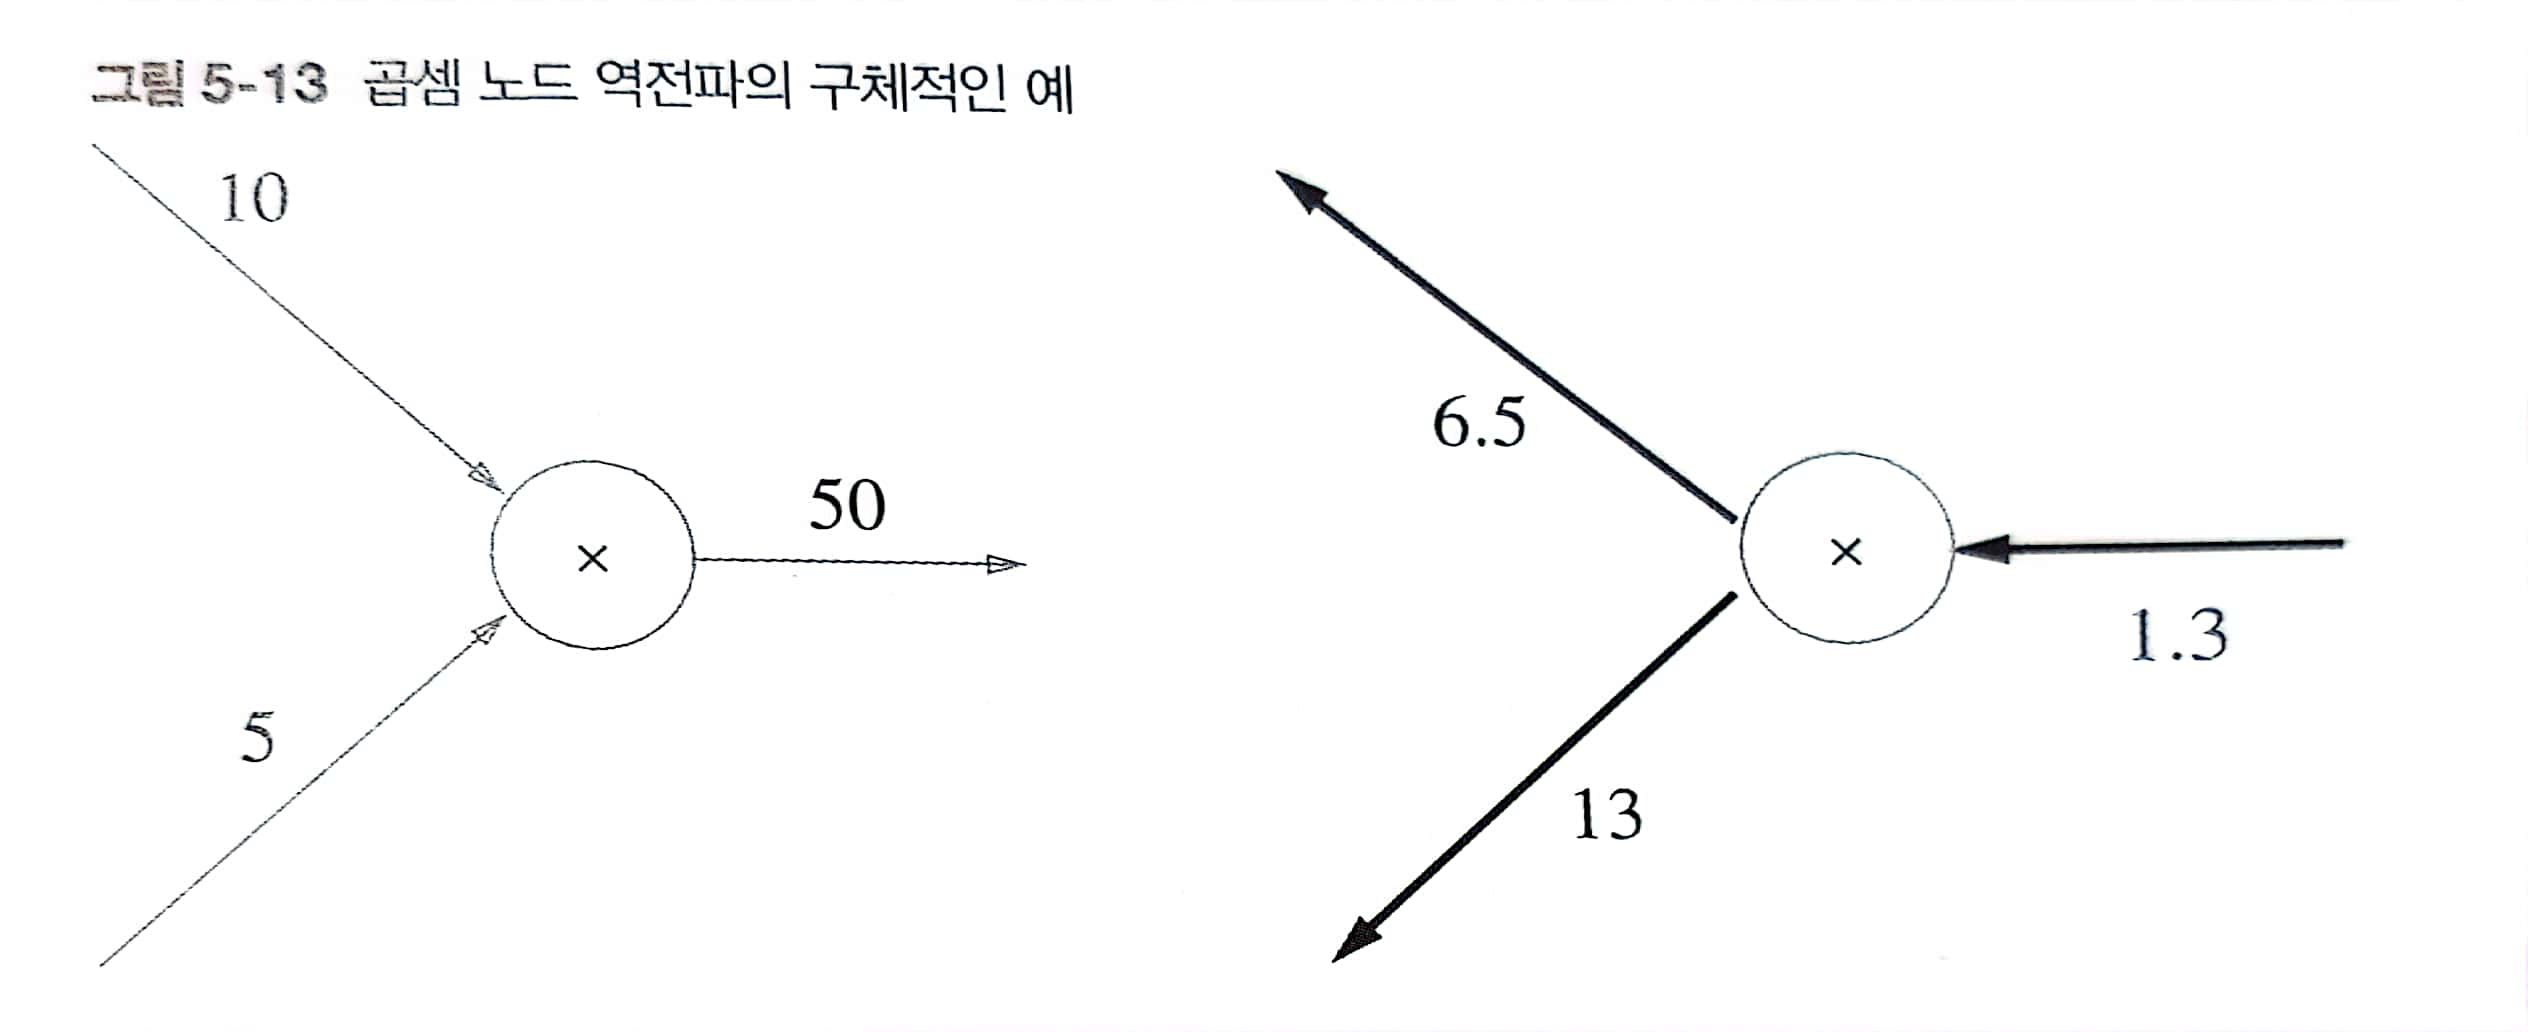
  
---

# 5. 예

### (1) 사과 쇼핑의 예: 역전파 p163 [그림 5-17]

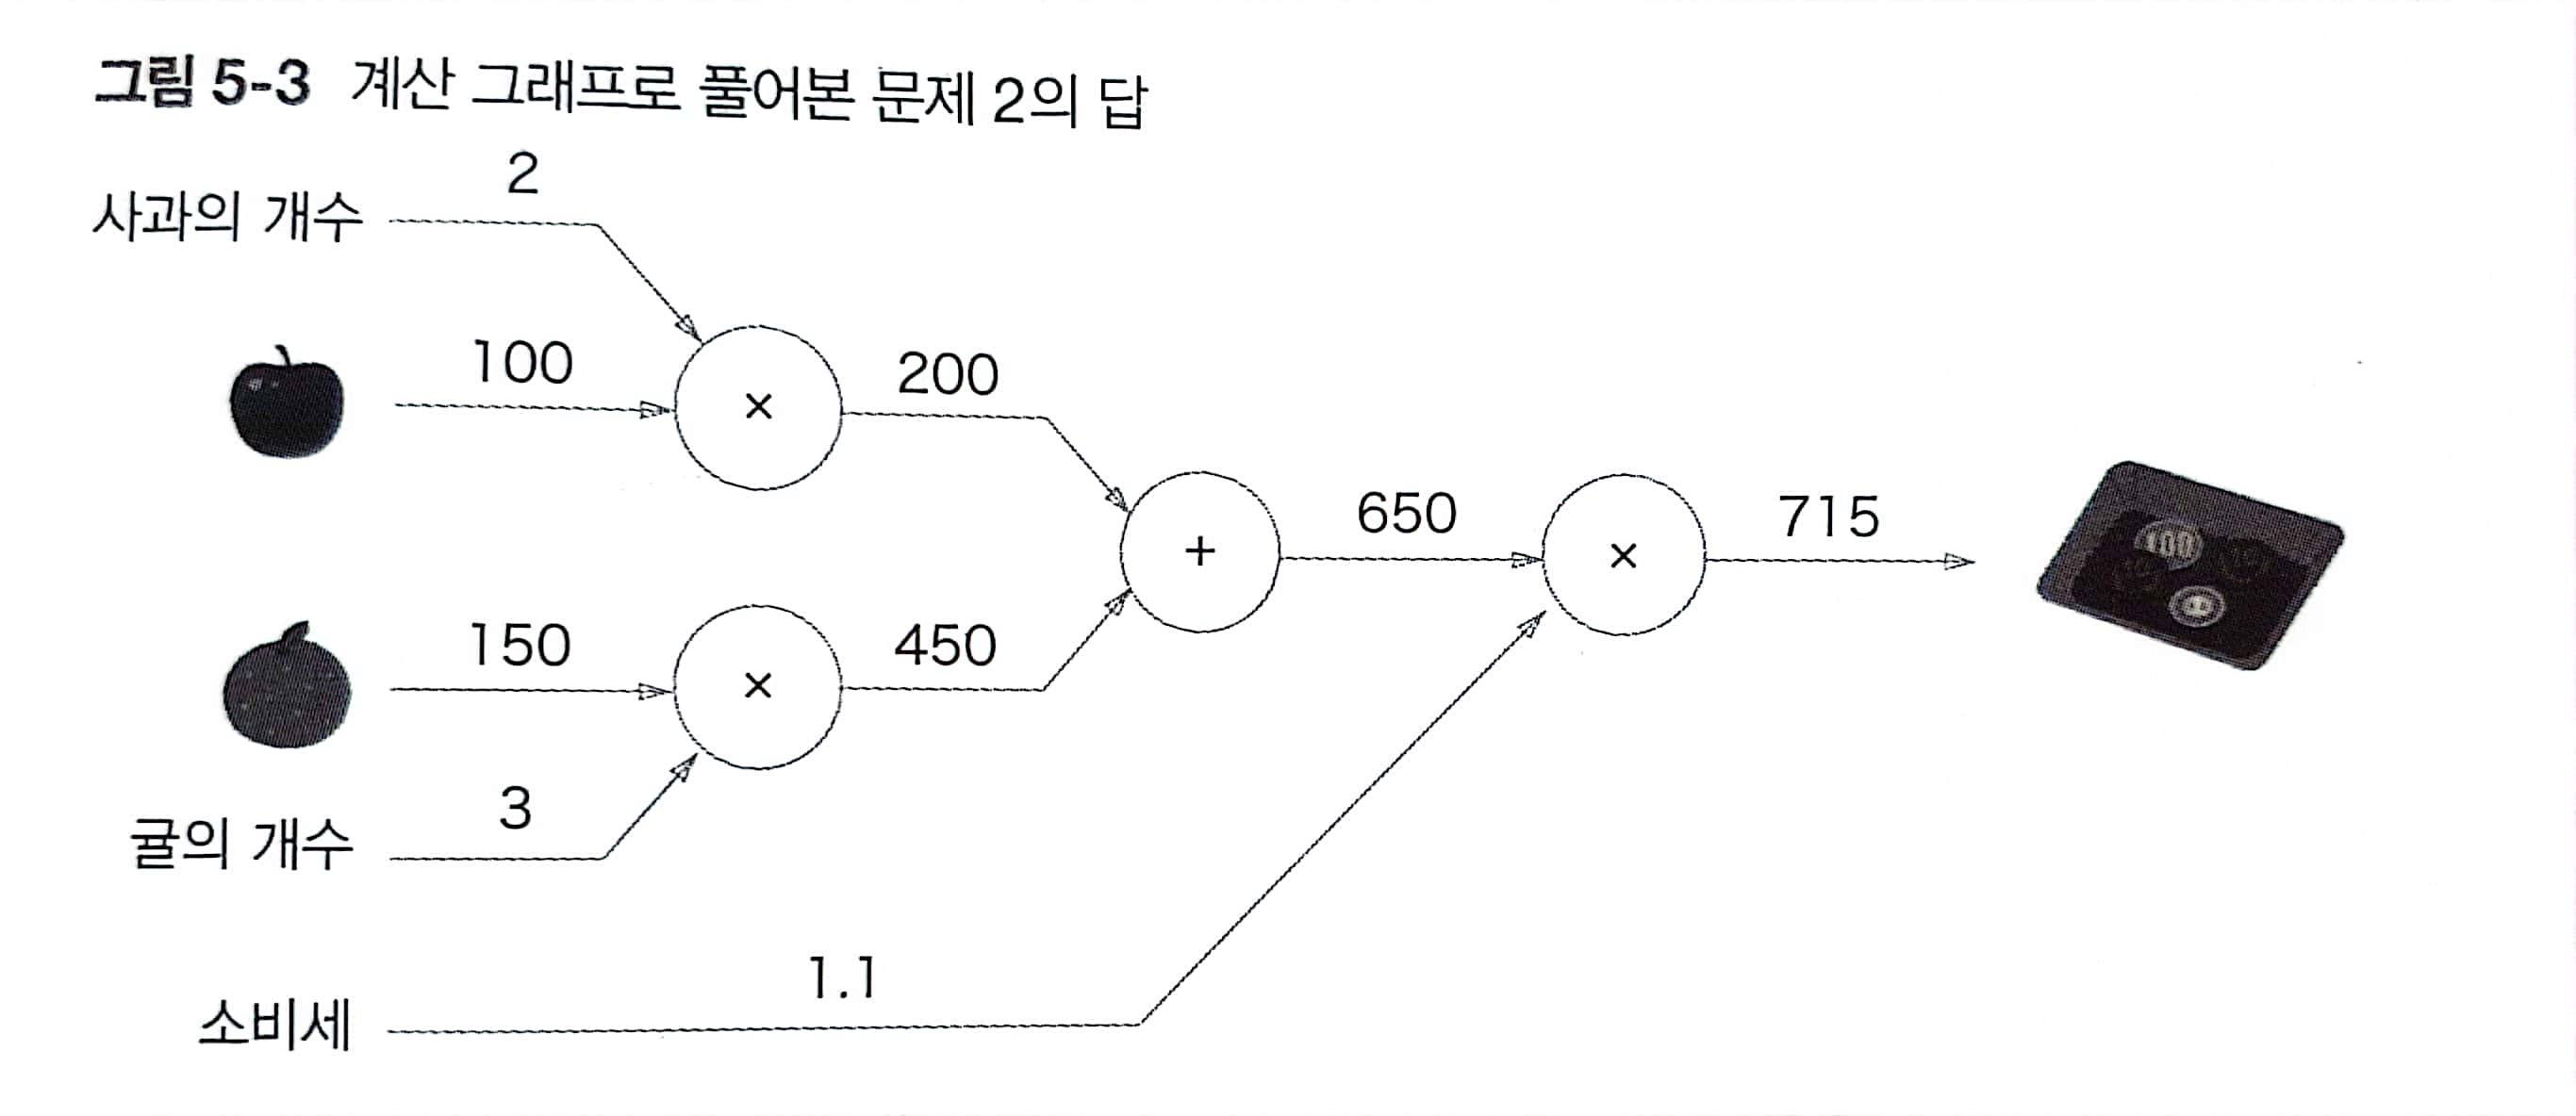

### (2) 채워보기

 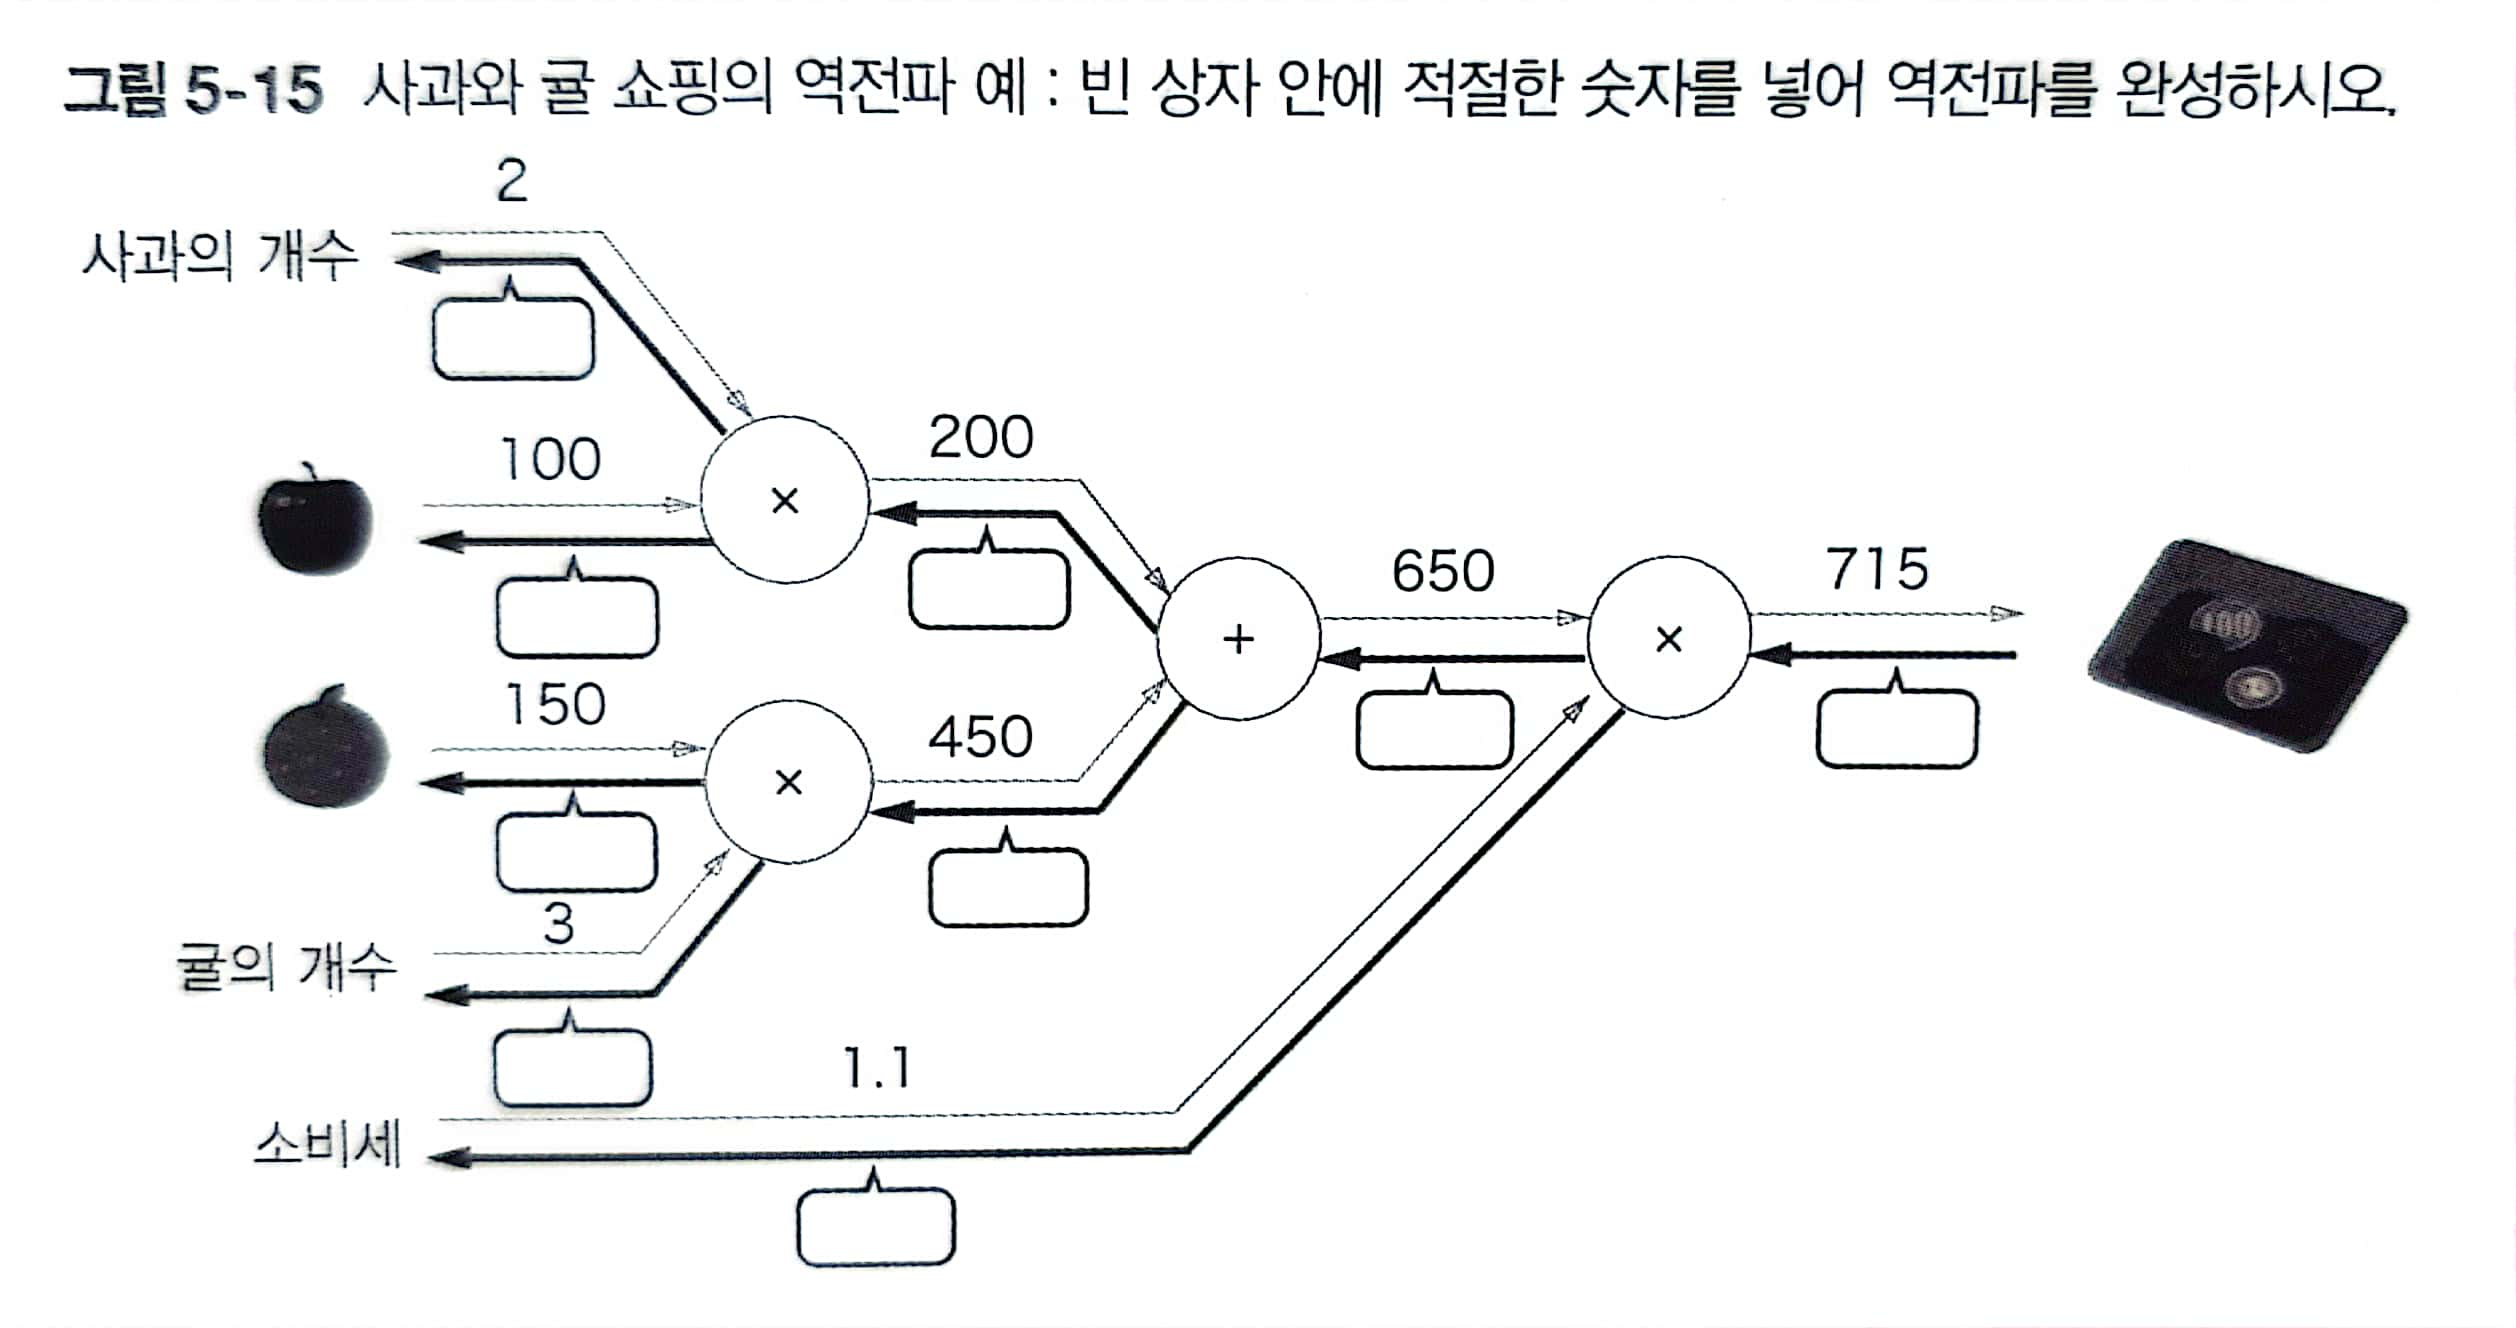

---

# 6. 코드 구현

## (1) 곱셈계층

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y    # x와 y를 바꾼다!!
        dy = dout * self.x
        
        return dx, dy

- forward( ): x, y를 인수로 받고, 두 값을 곱해서 반환

- backward( ): 상류에서 넘어온 미분(dout)에 순전파 때의 값을 '서로 바꿔' 곱한 후 다음 노드로 넘김.

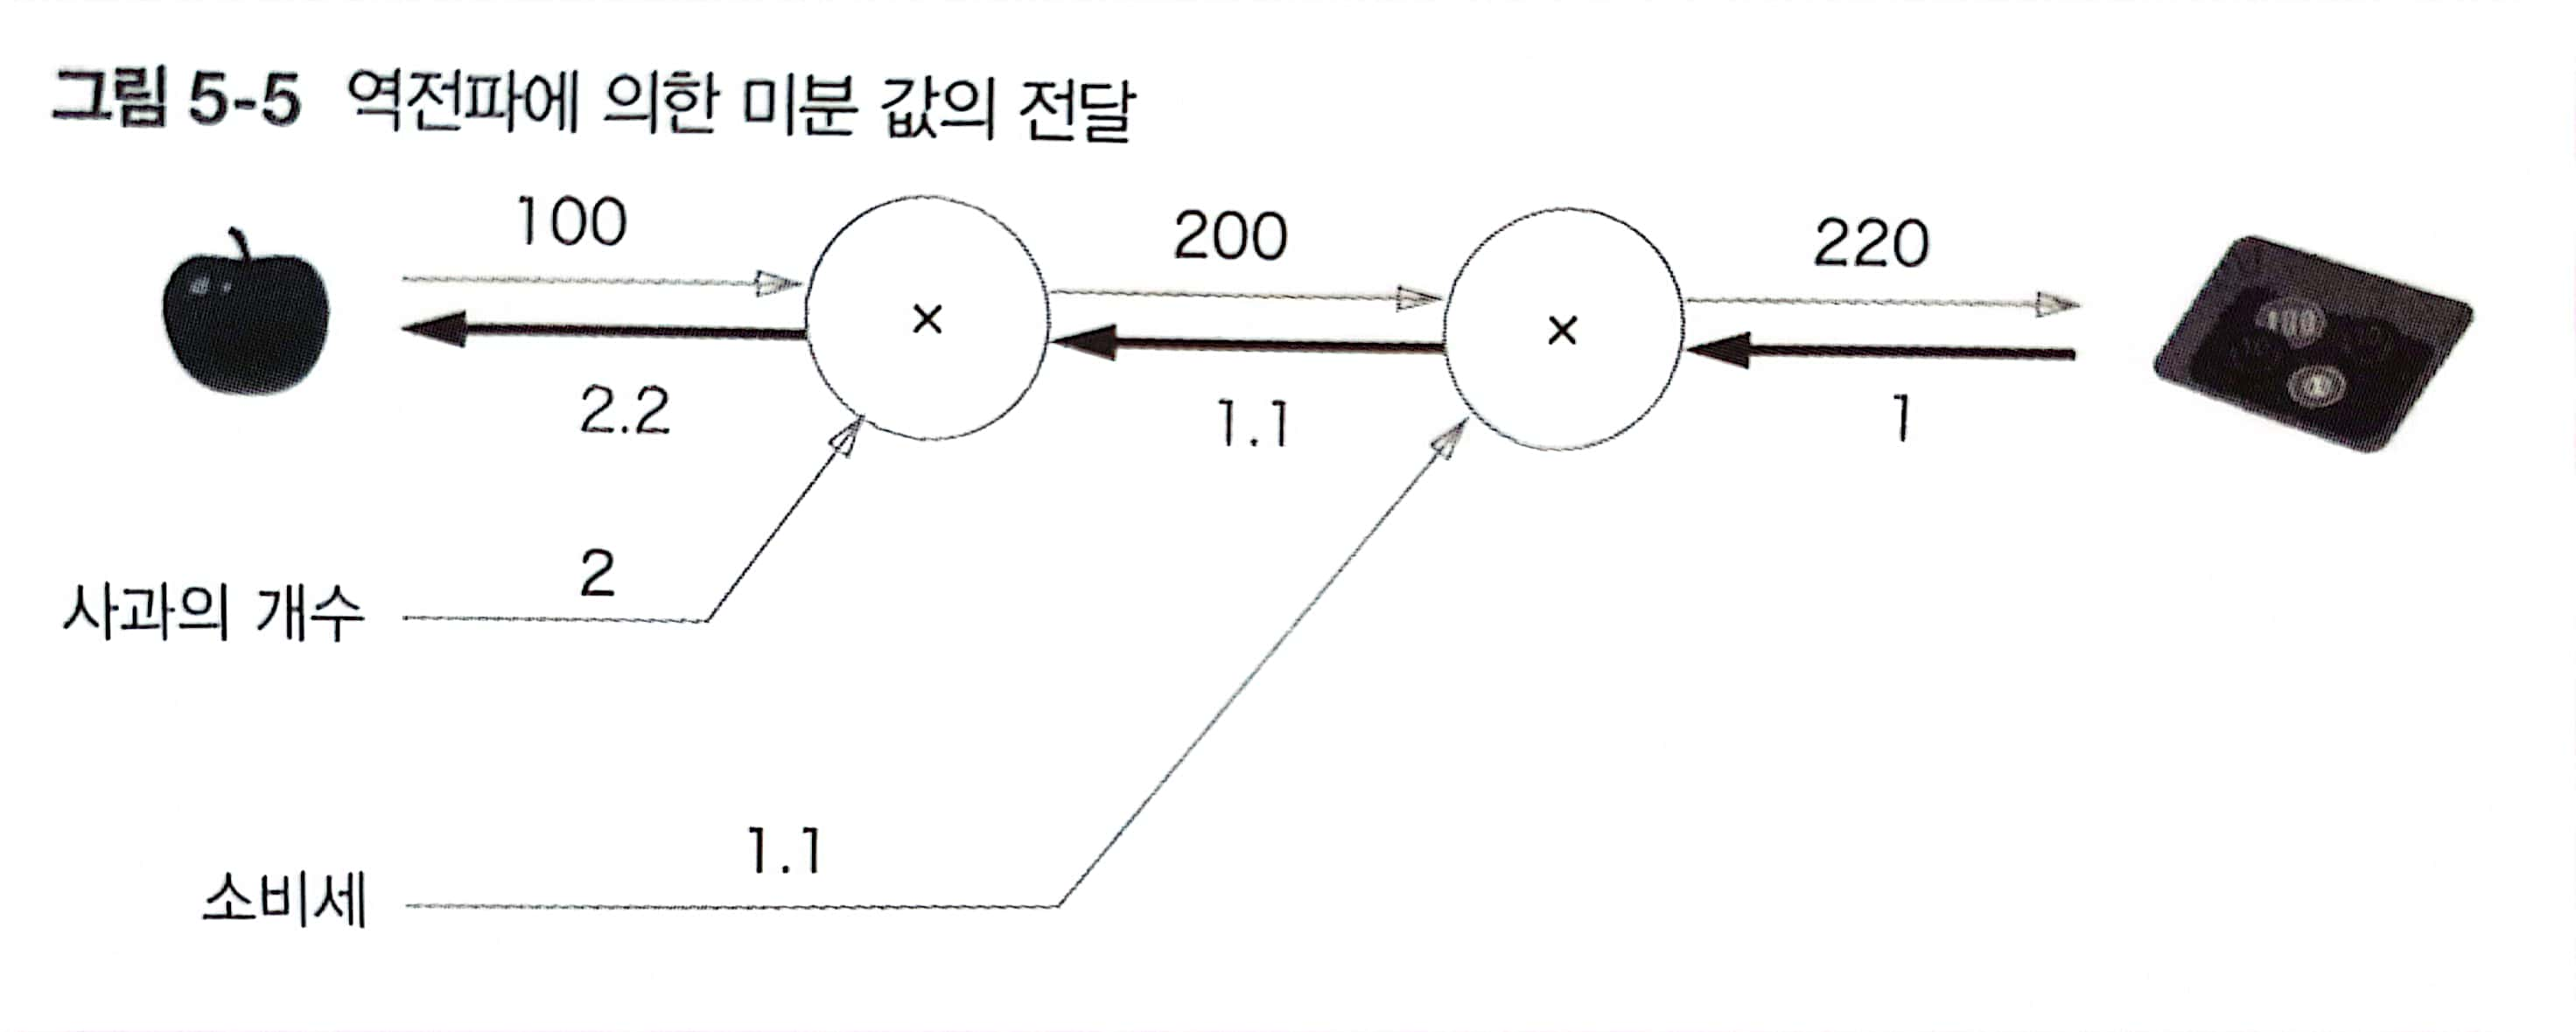

In [2]:
# <사과 쇼핑 구현>

apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print("사과 가격: ", price, '\n')

# 역전파
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("dapple:", dapple, ", dapple_num: ", dapple_num, ", dtax:", dtax)

사과 가격:  220.00000000000003 

dapple: 2.2 , dapple_num:  110.00000000000001 , dtax: 200


## (2) 덧셈계층

In [4]:
class AddLayer:
    def __init__(self):
        pass
        
    def forward(self, x, y):
        out = x + y
        
        return out
    
    def backward(self, dout):
        dx = dout * 1    # 그대로 다음 노드에 전달
        dy = dout * 1
        
        return dx, dy

- 덧셈계층에서는 초기화가 필요 없으니 __init__()에서는 아무일도 하지 않음 (pass이용)

In [7]:
# <사과 2개와 귤 3개 쇼핑 구현>

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) # (1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax)  #(4)

print("전체 과일 가격: ", price, '\n')

# 역전파
dprice = 1

dall_price, dtax = mul_tax_layer.backward(dprice)  #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print("dapple:", dapple, ", dapple_num: ", dapple_num,"\n",
      "dorange:", dorange, ", dorange_num: ", dorange_num, ", dtax:", dtax)

전체 과일 가격:  715.0000000000001 

dapple: 2.2 , dapple_num:  110.00000000000001 
 dorange: 3.3000000000000003 , dorange_num:  165.0 , dtax: 650


---

# 7. 활성화 함수 계층 구현

## (1) ReLU 계층

- ReLU 식: $y = \begin{cases} x & ( x > 0) \\ 0 & ( x \le 0 ) \end{cases}   \Rightarrow \frac{ \partial y}{\partial x} = \begin{cases} 1 & ( x > 0) \\ 0 & ( x \le 0 ) \end{cases}$


- 순전파 때 입력 x가 0보다 크면 역전파는 값을 그대로 다음 노드로 전달


- 반면, 순전파 때 입력 x가 0 이하이면 역전파는 하류로 신호를 보내지 않음


- **[ 코드구현 ]**

In [8]:
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0   
        dx = dout
        
        return dx

In [11]:
# 참고

import numpy as np

x = np.array( [[1.0, -0.5], [-2.0, 3.0]])
print(x, '\n')

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]] 

[[False  True]
 [ True False]]


- mask라는 인스턴스 변수: True/False로 구성된 넘파이 배열, 순전파의 입력 x가 0이하인 인덱스는 True, 그 외(0보다 큰 원소)는 False로 유지, 역전파시 mask의 원소가 True인 곳에는 전파된 dout를 0으로 설정


## (2) Sigmoid 계층

- Sigmoid 식: $y = \frac{1}{1+e^{-x}}\ $
